(array([ 2834.,  5688.,  8352., 11199., 13848., 16722., 13695., 11032.,
         8342.,  5574.,  2714.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

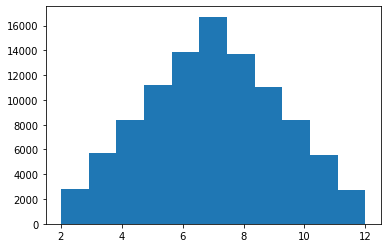

In [38]:
import random
# Simulate two dice being rolled and their resulting rolls being summed
def DICE():
    x1 = random.randint(1,6)
    x2 = random.randint(1,6)
    return x1 + x2

# Testing random distribution
x=[]
for i in range(100000):
    x.append(DICE())
    
import matplotlib.pyplot as plt
plt.hist(x, bins=11)

# Main class
## To do:
## Timing and calendar
## delay(), service() and removing customers from queue

In [37]:
import numpy as np
import random
import pandas as pd

#set random seed for consistency in testing
np.random.seed(0)
    
    
## ============== Helper Functions ==============
# Simulate two dice being rolled and their resulting rolls being summed
def DICE():
    x1 = random.randint(1,6)
    x2 = random.randint(1,6)
    return x1 + x2

def generate_event_type():
    if DICE() <= 4:
        return "car_stereo"
    else:
        return "others"
## ============== Event Calendar Class ==============
# Use: Schedule all events in calendar before work then pop next event when ready during simulation
class event_calendar():
    def schedule_event(self,event_time,event_type):
        self.event_calendar.append([event_time,event_type])
        self.event_calendar = sorted(self.event_calendar, key=lambda x: x[0])
    
    def next_event(self):
        event_time,event_type = self.event_calendar.pop(0)
        self.current_time = event_time

        if event_type == "arrival":
            customer = DICE()
            self.arrival(customer)
        elif event_type == "departure":
            # self.departure()
            pass
        
## ============== Event class ==============         
class callEvent:
    def __init__(self, time, event_type, product_type):
        self.time = time
        self.type = event_type
        self.product_type = product_type
        
    def __str__(self):
        return f'callEvent(time: {self.time}, type: {self.type}, product_type: {self.product_type})'
    
def generate_arrival(time):
    type_roll = DICE()
    product_type = 'car-stereo' if type_roll <= 4 else 'other' # car-stereo/other
    return callEvent(time, 'arrival', product_type)










## ============== Call Center Class ==============
# Class specifics:
# - time is measured in minutes
# - customers refer to callers

# Random variables:
#1. Time between arrivals of calls at the center = (DICE * 0.333) minutes.
#2. The delay at the IVR unit = (DICE * 0.3) minutes.
#3. The delay for car-stereo call processing = (DICE * 2) minutes.
#4. The delay for other-product call processing= (DICE) minutes. 

# Main class
## To do:
## Timing and calendar
## delay(), service() and removing customers from queue
class callCenter():# a call center simulation class
    def __init__(self):
        self.arrival_queue = [] # a queue before others have decided to go to car or other.
        self.car_stereo_representative_queue = []
        self.others_representative_queue = []
        
        self.server_state = 0 #0 = idle, 1 = busy
        self.clock = 0
        self.event_calendar = pd.DataFrame(columns=['time','type','service_time','product_type','departure_time','waiting_time'])

        self.maximum_slots = 5 # maximum queue length for call arrivals to splitter

        
    def add_event(self, event):
        # Add a new event to the event calendar 
        new_event = pd.DataFrame({'time': [event.time], 'type': [event.type], 'product_type': [event.product_type]})
        self.event_calendar = pd.concat([self.event_calendar, new_event], ignore_index=True)

        
    def run_simulation(self, end_time): #if time is greater than 5*60 = 300 minutes, then call center is closed
        while (self.event_calendar.empty == False) and (self.clock < end_time):
            # Order events by time and pop top
            self.event_calendar = self.event_calendar.sort_values(by="time")
            curr_event = callEvent(self.event_calendar.iloc[0].time, self.event_calendar.iloc[0].type, self.event_calendar.iloc[0].product_type)
            self.event_calendar = self.event_calendar.iloc[1:]
            
            self.clock = curr_event.time
            self.handle_event(curr_event)
            
    def handle_event(self, event):
        if event.type == 'arrival':
            self.arrival_queue.append(event)
            delay = DICE()
            depart_event = callEvent(self.clock + delay, 'departure', event.product_type)
            print(depart_event)
            self.add_event(depart_event)
        elif event.type == 'departure':
            self.arrival_queue.pop(0)


            
# ==== Main ====
end_time = 300

cc = callCenter()
for i in range(100):
    cc.add_event(generate_arrival(i))

cc.run_simulation(end_time)



callEvent(time: 6, type: departure, product_type: other)
callEvent(time: 9, type: departure, product_type: other)
callEvent(time: 12, type: departure, product_type: other)
callEvent(time: 9, type: departure, product_type: other)
callEvent(time: 11, type: departure, product_type: other)
callEvent(time: 13, type: departure, product_type: other)
callEvent(time: 16, type: departure, product_type: other)
callEvent(time: 13, type: departure, product_type: other)
callEvent(time: 16, type: departure, product_type: other)
callEvent(time: 15, type: departure, product_type: car-stereo)
callEvent(time: 13, type: departure, product_type: other)
callEvent(time: 19, type: departure, product_type: other)
callEvent(time: 20, type: departure, product_type: other)
callEvent(time: 23, type: departure, product_type: other)
callEvent(time: 23, type: departure, product_type: car-stereo)
callEvent(time: 21, type: departure, product_type: other)
callEvent(time: 23, type: departure, product_type: other)
callEve

In [ ]:

self.event_calendar = self.event_calendar.sort_values(by="time")
curr_event = Event(self.event_calendar.iloc[0].time, self.event_calendar.iloc[0].type, self.event_calendar.iloc[0].product_type)

In [ ]:

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    # ==== Event Processing ====
    # Input: customer - a random number generated representing if a customer is calling for car stereo or others
    # Assumption: Because the run function already handles the arrival queue busy signaling, we do not need to here
    def arrival (self,customer:int): # customer id 
        # 11am to 4pm - 5 hours of peak time
        if self.current_time > end_time: #
            print("Call Center Closed")
            return
        
        print("Arrival")
        #adding product type to customer
        # print(f'arrival {customer}')
        # print(f'{self.customer_df}')
        self.customer_df.loc[self.customer_df['customer_id']== customer, 'product_type'] = generate_event_type()
        current_customer = self.customer_df.loc[self.customer_df['customer_id']== customer]
        print(current_customer["product_type"])
        print(f'{self.customer_df}')  

        if current_customer['product_type'].iloc[0] == 'car_stereo': #if random DICE number is <= 4, then add to car-stereo queue
            if len(self.car_stereo_representative_queue) > self.maximum_slots: #if there are no available spots for car stereo
                if len(self.arrival_queue) > self.maximum_slots:
                    print("No available slots")
                    return
                self.arrival_queue.append(current_customer)
                
                # Delay for car-stereo call processing
                delay(DICE() * 2)
                
            #there are availble spots for car stereo
            print("Add to Car Stereo Queue")
            self.car_stereo_representative_queue.append(current_customer)
        #if random number is greater than 4, then add to others queue
        else:
            if len(self.others_representative_queue) > self.maximum_slots: #if there are no available spots for others
                if len(self.arrival_queue) > self.maximum_slots:
                    print("No available slots")
                    return 
                self.arrival_queue.append(current_customer)
                
                # Delay for other-product call processing
                delay(DICE())
            print("Add to Others Queue")
            self.others_representative_queue.append(current_customer)

    def available_signal_checking(self, queue)-> bool:
        if len(queue) > self.maximum_slots:
            return 0 #0 = no signal
        else:
            return 1 #1 = signal
 
    def run(self,event_calendar:pd.DataFrame) -> None: 
        self.server_state = 1   

        while self.server_state == 1:
            # self.current_time += 1
            # print("Time: ", self.time)
    
            if self.available_signal_checking(self.arrival_queue):
                for i in range(len(event_calendar)):
                    if event_calendar.iloc[i]['event_type'] == "arrival":
                        customer_id = event_calendar.iloc[i]['customer_id']
                        self.customer_df = self.customer_df.append(event_calendar.iloc[i])
                        # event_calendar = event_calendar.drop(i)
                        self.arrival(customer_id)
                        # print(event_calendar.iloc[i])
            # self.service()
            # self.departure()
            # print("Car Stereo Queue: ", self.car_stereo_representative_queue)
            # print("Others Queue: ", self.others_representative_queue)
            # print("Server State: ", self.server_state)
            # print("Time: ", self.time)
            else:
                print("No available slots")



In [5]:
#implement the simulation clock and the advance of the simulation clock, as well as an event calendar (event list) which is a list of events as they are scheduled. In every simulation, there is only one calendar and it is ordered by the earliest scheduled-time first.

# creating event calendar list
event_calendar_list = pd.DataFrame(columns = ['customer_id','event_time','service_time','event_type'])
event_calendar_list['customer_id'] = np.random.randint(1,6,5)
event_calendar_list['event_time'] = np.random.randint(0,300,5)
event_calendar_list['service_time'] = np.random.randint(0,300,5)
event_calendar_list['event_type'] = np.random.choice(["arrival"],5)

event_calendar_list = event_calendar_list.sort_values(by=['event_time'])

# for col in event_calendar_list.columns:
#     print(event_calendar_list[col])
# print(event_calendar_list.iloc[0])
#initialize call center simulation
test = callCenter()
#run simulation
test.run(event_calendar_list)


AttributeError: 'DataFrame' object has no attribute 'append'